In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import io
import sys
sys.path.append("..")
from utils import test_train_split, evaluate_model_torch, subtract_spont, corrcoef, PCA,zscore
import sys
sys.path.insert(1, '/home/maria/Documents/EnsemblePursuit')
from EnsemblePursuit.EnsemblePursuit import EnsemblePursuit
import seaborn as sns

In [5]:
data = io.loadmat('/home/maria/Documents/EnsemblePursuit_old/SAND9/data/natimg2800_M170717_MP034_2017-09-11.mat')
resp = data['stim'][0]['resp'][0]
spont =data['stim'][0]['spont'][0]
X=subtract_spont(spont,resp)

In [6]:
ep=EnsemblePursuit(n_components=150,lam=0.01,n_kmeans=150)
model=ep.fit(X)
U=model.weights
V=model.components_
print(U.shape)
print(V.shape)

obtained 150 PCs in 3.9172 seconds
initialized 150 clusters with k-means in 10.4337 seconds
ensemble 0, time 2.75, nr neurons 1431, EV 0.0058
ensemble 25, time 40.59, nr neurons 242, EV 0.0470
ensemble 50, time 66.33, nr neurons 200, EV 0.0638
ensemble 75, time 88.47, nr neurons 120, EV 0.0752
ensemble 100, time 108.71, nr neurons 68, EV 0.0845
ensemble 125, time 127.16, nr neurons 94, EV 0.0926
ensemble 149, time 143.62, nr neurons 33, EV 0.0993
average sparsity is 0.0185
(10103, 150)
(5880, 150)


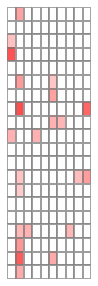

In [39]:
#U, 20 neurons, 10 components
maximum=np.max(U[:20,:10])
plt.figure(figsize=(1.5,5))
cm=sns.heatmap(U[:20,:10],cmap="bwr",cbar=False,xticklabels=False,yticklabels=False,alpha=0.7,vmax=maximum,vmin=-maximum,linecolor='gray',linewidth=1)
#plt.patch=True

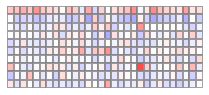

In [40]:
#V
maximum=np.max(V.T[:10,:30])
plt.figure(figsize=(3.5,1.5))
cm=sns.heatmap(V.T[:10,:30],cmap="bwr",cbar=False,xticklabels=False,yticklabels=False,alpha=0.7,vmax=maximum,vmin=-maximum,linecolor='gray',linewidth=1)

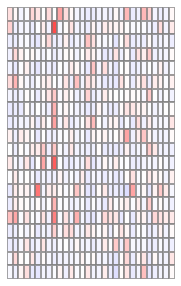

In [44]:
from scipy.stats import zscore
zsc=zscore(X,axis=0)
plt.figure(figsize=(3,5))
maximum=np.max(zsc[:20,:30])
cm=sns.heatmap(zsc[:20,:30],cmap="bwr",cbar=False,xticklabels=False,yticklabels=False,vmin=-maximum,vmax=maximum,alpha=0.7,linecolor='gray',linewidth=1)
plt.show()